<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [7]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold



from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [3]:
class MyLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X=mynormalize(X)
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X=mynormalize(X)
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return np.round(predictions)
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Small constant to avoid log(0)
        loss = -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
        return loss
def mynormalize(X_data):
    mean = np.mean(X_data, axis=0)
    std = np.std(X_data, axis=0)
    normalized_data = (X_data - mean) / std
    return normalized_data
    

In [195]:
file_name='Logistic_question.csv'
test_ratio=0.2
Data_file=pd.read_csv(file_name)
X=Data_file.iloc[:, :-1]  # Features
y=np.round(Data_file.iloc[:, -1])   # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=24)

model = MyLogisticRegression(0.01,1000)
model.fit(X_train.copy(), y_train)
y_pred = model.predict(X_test.copy())
print(metrics.accuracy_score(y_test, y_pred))

0.9625


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [ ]:
# Your code goes here!



**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [86]:
# Your code goes here!
model = LogisticRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.950


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [7]:
# import necessary libraries
# Your code goes here!
# This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

class MyMultinomialLogisticRegression:
    def __init__(self, num_classes, learning_rate=0.01, min_iterations=1000):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.min_iterations = min_iterations
        self.weights = None

    def softmax(self, z):
        """Compute the softmax function."""
        exp_z = np.exp(z)
        
        for i in range(exp_z.shape[0]):
            exp_z[i,:] =exp_z[i,:] / np.sum(exp_z[i,:])
        
        return exp_z 

    def cross_entropy_loss(self, y_true, y_pred):
        """Compute the cross-entropy loss."""
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=0))
    
    

    def gradient_descent(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.random.randn(num_features, self.num_classes)

        for _ in range(self.min_iterations):
            logits = X.dot(self.weights)
            probs = self.softmax(logits)
            #print(y)
            gradient = X.T.dot(probs - y) / num_samples
            self.weights -= self.learning_rate * gradient

    def fit(self, X_train, y_train):
        X_train=self.normalize_columns(X_train)

        # Assuming X_train and y_train are your training data (features and labels)
        self.gradient_descent(X_train, y_train)

    def predict(self, X):
        X=self.normalize_columns(X)
        logits = X.dot(self.weights)
        return self.softmax(logits)
    def decision_function(self, X):
        X=self.normalize_columns(X)
        probs = self.predict(X)
        return np.argmax(probs, axis=1)
    def normalize_columns(self,matrix):
        scaler = StandardScaler()
        normalized_matrix = scaler.fit_transform(matrix[:,1:])
        normalized_matrix=np.concatenate((np.ones((normalized_matrix.shape[0], 1)), normalized_matrix), axis=1)
        return normalized_matrix

def quantize_array_indexes(arr, n):
    bin_edges = np.linspace(np.min(arr), np.max(arr), n )
    bin_indices = np.digitize(arr, bin_edges, right=False)-1
    return bin_indices
def generate_hat_vector(n, index):
    hat_vector = np.zeros(n)
    hat_vector[index] = 1
    return hat_vector
def y_to_mat(y,n):
    res=np.zeros(shape=(y.shape[0],n))
    for i in range(y.shape[0]):
        res[i,:]=generate_hat_vector(n,y[i])
    return(res)    
file_name='Logistic_question.csv'
test_ratio=0.2
Data_file=pd.read_csv(file_name)
X=Data_file.iloc[:, :-1]  
y=(Data_file.iloc[:, -1])   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=30)
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
for i in range(2,10,1):
    num_classes = i
    y_train2=y_to_mat(quantize_array_indexes(y_train.copy(),num_classes),num_classes)
    y_test2=y_to_mat(quantize_array_indexes(y_test.copy(),num_classes),num_classes)
    model = MyMultinomialLogisticRegression(num_classes, learning_rate=0.01, min_iterations=1000)
    X_train2=X_train.copy()
    model.fit(X_train2, y_train2)
    y_pred = model.decision_function(X_test)
    dif=0
    y_test2=quantize_array_indexes(y_test.copy(),num_classes)
    lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    lr.fit(model.normalize_columns(X_train2), quantize_array_indexes(y_train.copy(),num_classes))
    X_test2=model.normalize_columns(X_test)
    y_pred_builtin = lr.predict(X_test2)
    for i in range(len(y_pred)):
        if(y_pred[i]==y_test2[i]):
            dif=dif+1
    accuracy = accuracy_score(y_test2, y_pred)
    accuracy2 = accuracy_score(y_test2, y_pred_builtin)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Accuracy built in: {accuracy2:.3f}")

Accuracy: 0.988
Accuracy built in: 0.988
Accuracy: 0.863
Accuracy built in: 0.850
Accuracy: 0.725
Accuracy built in: 0.812
Accuracy: 0.675
Accuracy built in: 0.750
Accuracy: 0.662
Accuracy built in: 0.675
Accuracy: 0.425
Accuracy built in: 0.575
Accuracy: 0.362
Accuracy built in: 0.662
Accuracy: 0.412
Accuracy built in: 0.438


**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [87]:
# Your code goes here!

# the code and results are higher up


6.4 1.2
Quantized indices: [1 3 1 1 2]


**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

# Your code goes here!


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**
**1 - Dropping Missing Values (Deletion):**<br>
This method involves removing rows or columns with missing data. You can use the dropna() function in Python libraries like Pandas to drop observations containing null values.<br>
**Pros:** Simple and straightforward.<br>
**Cons:** May lead to loss of valuable information if many rows or columns have missing values. Use this cautiously.<br>
**Decision Criteria:** Use when the proportion of missing data is small and doesn’t significantly impact the dataset.<br>
**2 - Imputation (Filling in Missing Values):**<br>
Imputation replaces missing values with estimated or predicted values. Common imputation techniques include mean, median, mode, or regression-based imputation.<br>
**Pros:** Retains more data than deletion.<br>
**Cons:** Imputed values may introduce bias.<br>
**Decision Criteria:** Choose based on the nature of the data and the impact of imputed values on downstream analyses.<br>
**3 - Flagging Missing Values:**<br>
Instead of imputing or deleting, you can create a new binary variable (flag) indicating whether a value is missing.<br>
**Pros:** Retains original data and provides information about missingness.<br>
**Cons:** Increases dimensionality.<br>
**Decision Criteria:** Useful when missingness itself is informative (e.g., missing salary data indicating unemployment).<br>
**4 - Interpolation:**<br>
Interpolation estimates missing values based on neighboring data points. It’s commonly used for time series data.<br>
**Pros:** Preserves trends and patterns.<br>
**Cons:** Assumes smoothness between adjacent points.<br>
**Decision Criteria:** Suitable for time series or ordered data where interpolation makes sense.<br>
**5 - Advanced Techniques (e.g., Machine Learning Models):**<br>
Use machine learning models (e.g., decision trees, random forests, or neural networks) to predict missing values based on other features.<br>
**Pros:** Can capture complex relationships.<br>
**Cons:** Requires more computational resources and expertise.<br>
**Decision Criteria:** Consider when other methods are insufficient or when you want to leverage existing features for imputation.<br>


**Task:** Handle null entries using your best method.

In [10]:
# Your code goes here!
dataset = pd.read_csv('adult.csv', na_values='?')
null_counts_per_column =dataset.isnull().sum()
#print(null_counts_per_column)
dataset=preprocess_adult_dataset(dataset)
dataset = dataset.astype(int)
dataset=dataset.fillna(dataset.mean())
#print(dataset.head(0))

dataset['age'] = (dataset['age'] - dataset['age'].mean()) / dataset['age'].std()
dataset['fnlwgt'] = (dataset['fnlwgt'] - dataset['fnlwgt'].mean()) / dataset['fnlwgt'].std()
dataset['capital-gain'] = (dataset['capital-gain'] - dataset['capital-gain'].mean()) / dataset['capital-gain'].std()
dataset['capital-loss'] = (dataset['capital-loss'] - dataset['capital-loss'].mean()) / dataset['capital-loss'].std()

# Split data into features (X) and target (y)
X = dataset.drop(columns=['income_>50K'])
y = dataset['income_>50K']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"logistic regression model Accuracy: {accuracy:.2f}")






y= y

categorical_columns =[col for col in X.columns if X[col].dtype =='object']
numeric_columns=[col for col in X.columns if col not in categorical_columns]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

#hyperparameters for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("GridSearchCV Best Parameters:", grid_search.best_params_)
print("GridSearchCV Train Accuracy:", grid_search.best_score_)
print("GridSearchCV Test Accuracy:", grid_search.score(X_test, y_test))




logistic regression model Accuracy: 0.86
GridSearchCV Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
GridSearchCV Train Accuracy: 0.8509711574661093
GridSearchCV Test Accuracy: 0.8567918927218753


In [2]:
def preprocess_adult_dataset(df):
    # Select categorical features
    categorical_features = ['workclass', 'education', 'marital-status','income', 'occupation', 'relationship', 'race', 'gender','native-country']
    # Apply one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    return df_encoded


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.
**done higher up**<br>
logistic regression model Accuracy: 0.86<br>
GridSearchCV Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}<br>
GridSearchCV Train Accuracy: 0.8509711574661093<br>
GridSearchCV Test Accuracy: 0.8567918927218753<br>

In [35]:
# Your code goes here!
# done higher up

In [4]:
def split_predct(n,X,y,x_test):

    X_train=np.array(X)
    X_test=np.array(x_test)
    y_train=np.array(y)

    X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
    X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

    pred_sum=np.zeros(shape=(X_test.shape[0],2))
    pred_sum_train=np.zeros(shape=(X_train.shape[0],2))
    y_train=y_train.reshape((X_train.shape[0],1))
    to_con= np.concatenate((y_train, X_train), axis=1)

    splitarr = np.array_split(to_con, n,axis=0)

    for i in range(n):
        y_splited=splitarr[i][:,0]
        x_splitet=splitarr[i][:,0:-1]
        y_splited=np.round(y_splited.astype(int))
        #print(y_splited)
        my_model=MyMultinomialLogisticRegression(2,0.01,1000)
        
        y_train2=y_to_mat(y_splited.copy(),2)

        my_model.fit(x_splitet,y_train2)
        pred_sum=pred_sum+my_model.predict(X_test)
        pred_sum_train=pred_sum_train+my_model.predict(X_train)
        #print(pred_sum.shape)
    return np.argmax(pred_sum, axis=1),np.argmax(pred_sum_train,axis=1)
        

In [8]:
# Your code goes here!
dataset = pd.read_csv('adult.csv', na_values='?')
null_counts_per_column =dataset.isnull().sum()
#print(null_counts_per_column)
dataset=preprocess_adult_dataset(dataset)
dataset = dataset.astype(int)
dataset=dataset.fillna(dataset.mean())
#print(dataset.head(0))

dataset['age'] = (dataset['age'] - dataset['age'].mean()) / dataset['age'].std()
dataset['fnlwgt'] = (dataset['fnlwgt'] - dataset['fnlwgt'].mean()) / dataset['fnlwgt'].std()
dataset['capital-gain'] = (dataset['capital-gain'] - dataset['capital-gain'].mean()) / dataset['capital-gain'].std()
dataset['capital-loss'] = (dataset['capital-loss'] - dataset['capital-loss'].mean()) / dataset['capital-loss'].std()

# Split data into features (X) and target (y)
X = dataset.drop(columns=['income_>50K'])
y = dataset['income_>50K']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


start=2
finish=100
accuracies_test=[]
accuracies_train=[]
pred_test=[]
pred_train=[]
for i in range(start,finish,5):

    my_pred,my_pred_train=split_predct(i,X_train,y_train,X_test)
    pred_test=pred_test+[my_pred]
    pred_train=pred_train+[my_pred_train]
    myaccuracy = accuracy_score(y_test, my_pred)
    myaccuracy_train = accuracy_score(y_train, my_pred_train)
    print(f"Accuracy test: {myaccuracy:.2f}")  
    accuracies_test=accuracies_test+[myaccuracy]  
    accuracies_train=accuracies_train+[myaccuracy_train]  




Accuracy test: 0.68
Accuracy test: 0.73
Accuracy test: 0.75
Accuracy test: 0.73
Accuracy test: 0.74
Accuracy test: 0.74
Accuracy test: 0.74
Accuracy test: 0.73
Accuracy test: 0.75
Accuracy test: 0.74
Accuracy test: 0.74
Accuracy test: 0.75
Accuracy test: 0.74
Accuracy test: 0.75
Accuracy test: 0.74
Accuracy test: 0.74
Accuracy test: 0.75


KeyboardInterrupt: 

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)<be>
<br>Here we used hard voting with weight we added probability output of each model and added them and gave chosed the most probable class,and its the best method for this task.
soft voting is not good for the cases when we have even number of models because it can lead to confusion.<br>


In [96]:
# Your code goes here!

#code is higher up


In [10]:
def plot_multiple_r2_on_same_axis(train_test_ratios, r2_values_list, labels,ylim,x_label,y_label,title,log):
    
    assert len(r2_values_list) == len(labels), "Number of R² value vectors must match the number of labels"
    plt.figure(figsize=(8, 6))
    for i, r2_values in enumerate(r2_values_list):
        if(log==0):
            plt.plot(train_test_ratios, r2_values, marker='o', label=labels[i])
        elif(log==1): 
            plt.semilogx(train_test_ratios, r2_values,marker='o', label=labels[i])
        elif(log==2):
            plt.semilogx(train_test_ratios, r2_values, label=labels[i])
        elif(log==3):
            plt.semilogy(train_test_ratios, r2_values, label=labels[i])        
    plt.xlabel(x_label)#'Train Ratio')
    plt.ylabel(y_label)#'R² Value')
    plt.title(title)#'R² vs. Train Ratio')
    plt.ylim(ylim)
    plt.grid(True)
    plt.legend()
    plt.show()

**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**
**1 - Voting Classifier:**<br>
The voting classifier combines predictions from multiple models (in this case, logistic regression models) by majority voting.<br>
It predicts the class that receives the most votes from the individual models.<br>
You can use either “hard” voting (simple majority) or “soft” voting (weighted by confidence scores).<br>
**2 - Bagging (Bootstrap Aggregating):**<br>
Bagging trains multiple models on random subsets of the data (with replacement).<br>
Each model is trained independently, and their predictions are averaged or majority-voted.<br>
It reduces variance and improves stability.<br>
**3 - Stacking:**<br>
Stacking combines predictions from multiple models by training a meta-model (usually another model) on their outputs.<br>
The base models (logistic regressions in our case) make predictions on the same data, and their predictions become features for the meta-model.
Stacking can capture complex relationships between base models.<br>

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.
<br>
**Because data set is very large and running time was around 5 minutes for each value of i ,we terminated the process and ploted for 17 values of i.**

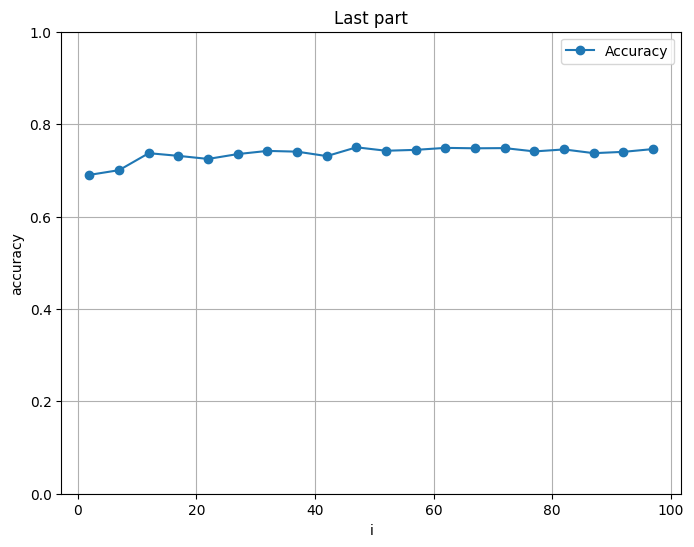

In [103]:
# Your code goes here!
sep=[]
s=0
for i in range(2,100,5):
    sep=sep+[i]
    s=s+1

plot_multiple_r2_on_same_axis(np.array(sep),[np.array(accuracies_test,np.array(accuracies_train))],['Accuracy test','Accuracy train'],[0,1],'i','accuracy','Last part',0)

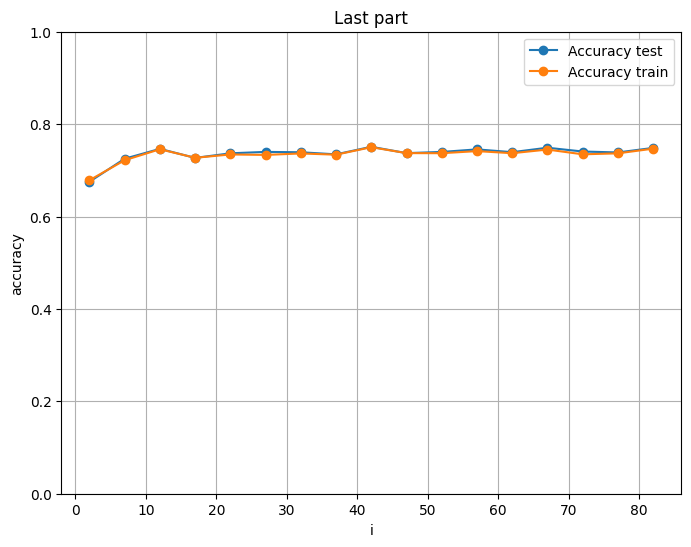

In [35]:
# Your code goes here!
sep=[]
s=0
for i in range(2,83,5):
    sep=sep+[i]
    s=s+1
plot_multiple_r2_on_same_axis(np.array(sep),[np.array(accuracies_test),np.array(accuracies_train)],['Accuracy test','Accuracy train'],[0,1],'i','accuracy','Last part',0)

**Question:** Analyze the results.

**Your Answer:**<br>
Best model i=12
As we can see because the data set is very large and also individual sub sets of data sets are not biased the accuracy doesn't change across different values of i and when we split the data set and then get the average of probabilities overfitting becomes less as we can see from the results the test and train accurecies are close to each other so overfotting didn't accured.